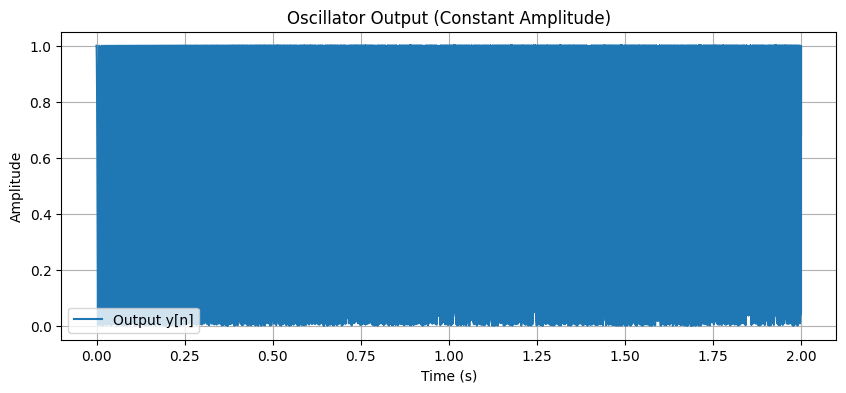

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio 

# Basic parameters - samplerate, duration, number of samples
fs = 48000.0          
T = 2.0               
N = int(fs * T)

# Create array of frequencies for sine sweep
n_array = np.arange(N)
f_start = 60.0
f_end = 2000.0
f_array = f_start + (f_end - f_start)*n_array/(N - 1)

# --- Compute the bilinear digital angle ---
omega_a = 2.0 * np.pi * f_array
w = 2.0 * np.arctan( omega_a/(2.0*fs) )

# --- Create state variables for the oscillator ---
x1 = np.zeros(N)
x2 = np.zeros(N)

# initial conditions
x1[0] = 1.0 
x2[0] = 0.0

for n in range(1, N):
    w_old = w[n-1]
    w_new = w[n]
    # Using midpoint rule for angle since frequency is changing
    w_mid = 0.5*(w_old + w_new)
    
    # separate denominator of G into a variable so we can prevent potential division by 0
    denom = np.tan(w_old/2.0)

    # prevent division by zero when denominator is very small
    if abs(denom) < 1e-12:
        G = 1.0
    else:
        G = np.tan(w_new/2.0) / denom

    # Update states according to derived equations
    x1[n] = G * ( x1[n-1]*np.cos(w_mid) - x2[n-1]*np.sin(w_mid) )
    x2[n] = G * ( x1[n-1]*np.sin(w_mid) + x2[n-1]*np.cos(w_mid) )

# calculate the output signal
y = x1 * ( np.tan(w[0]/2.0) / np.tan(w/2.0) )

# get absolute value to simplify amplitude analysis
amp = np.abs(y)

# get time value for x-axis
t = n_array / fs

plt.figure(figsize=(10,4))
plt.plot(t, amp, label='Output y[n]')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Oscillator Output (Constant Amplitude)")
plt.legend()
plt.grid(True)
plt.show()

Audio(y, rate=fs)